In [1]:
%pylab notebook
import healpy as h
import numpy.polynomial.legendre as lgdr
import sys  ; sys.path.append("../../codes/")

from modules import euler as eu
from modules import aliasing_correction as ac

Populating the interactive namespace from numpy and matplotlib


In [23]:
nside=32
npix=h.nside2npix(nside)
lmax=2*nside


theta=90. ; phi=23.
cpix=h.ang2pix(nside,theta*pi/180.,phi*pi/180.)
cb,c2a,s2a,spix=eu.fn_s2euler_alpha(nside,cpix)
cb,c2g,s2g,spix=eu.fn_s2euler_gamma(nside,cpix)
b,a,g,s=ac.return_euler_angles(nside,cpix)
cb,c2amg,s2amg,c2apg,s2apg,s=eu.fn_s2euler_alpha_gamma(nside,cpix)

../../codes/modules/euler.py:87: RuntimeWarning: divide by zero encountered in divide
  sinalpha=np.where(abs(cosbeta)<1.,-np.sin(theta1)*np.sin(phi0-phi1)/np.sqrt(1.-cosbeta*cosbeta),0.)
../../codes/modules/euler.py:87: RuntimeWarning: invalid value encountered in divide
  sinalpha=np.where(abs(cosbeta)<1.,-np.sin(theta1)*np.sin(phi0-phi1)/np.sqrt(1.-cosbeta*cosbeta),0.)
../../codes/modules/euler.py:88: RuntimeWarning: divide by zero encountered in divide
  cosalpha=np.where(abs(cosbeta)<1.,(np.cos(theta1) - np.cos(theta0)*cosbeta)/(np.sin(theta0)*np.sqrt(1.-cosbeta*cosbeta)),0)
../../codes/modules/euler.py:88: RuntimeWarning: invalid value encountered in divide
  cosalpha=np.where(abs(cosbeta)<1.,(np.cos(theta1) - np.cos(theta0)*cosbeta)/(np.sin(theta0)*np.sqrt(1.-cosbeta*cosbeta)),0)
../../codes/modules/euler.py:106: RuntimeWarning: divide by zero encountered in divide
  singamma=np.where(abs(cosbeta)<1.,-np.sin(theta0)*np.sin(phi0-phi1)/np.sqrt(1.-cosbeta*cosbeta),0.)
../../codes/m

In [24]:
teb=[np.zeros(npix),np.zeros(npix),np.zeros(npix)] ; teb[2][cpix]=1
tqu=[np.zeros(npix),np.zeros(npix),np.zeros(npix)] ; tqu[1][cpix]=1

rtqu=h.alm2map(h.map2alm(teb,lmax=lmax,pol=False,iter=0),nside)
rteb=h.alm2map(h.map2alm(tqu,lmax=lmax,iter=0),nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


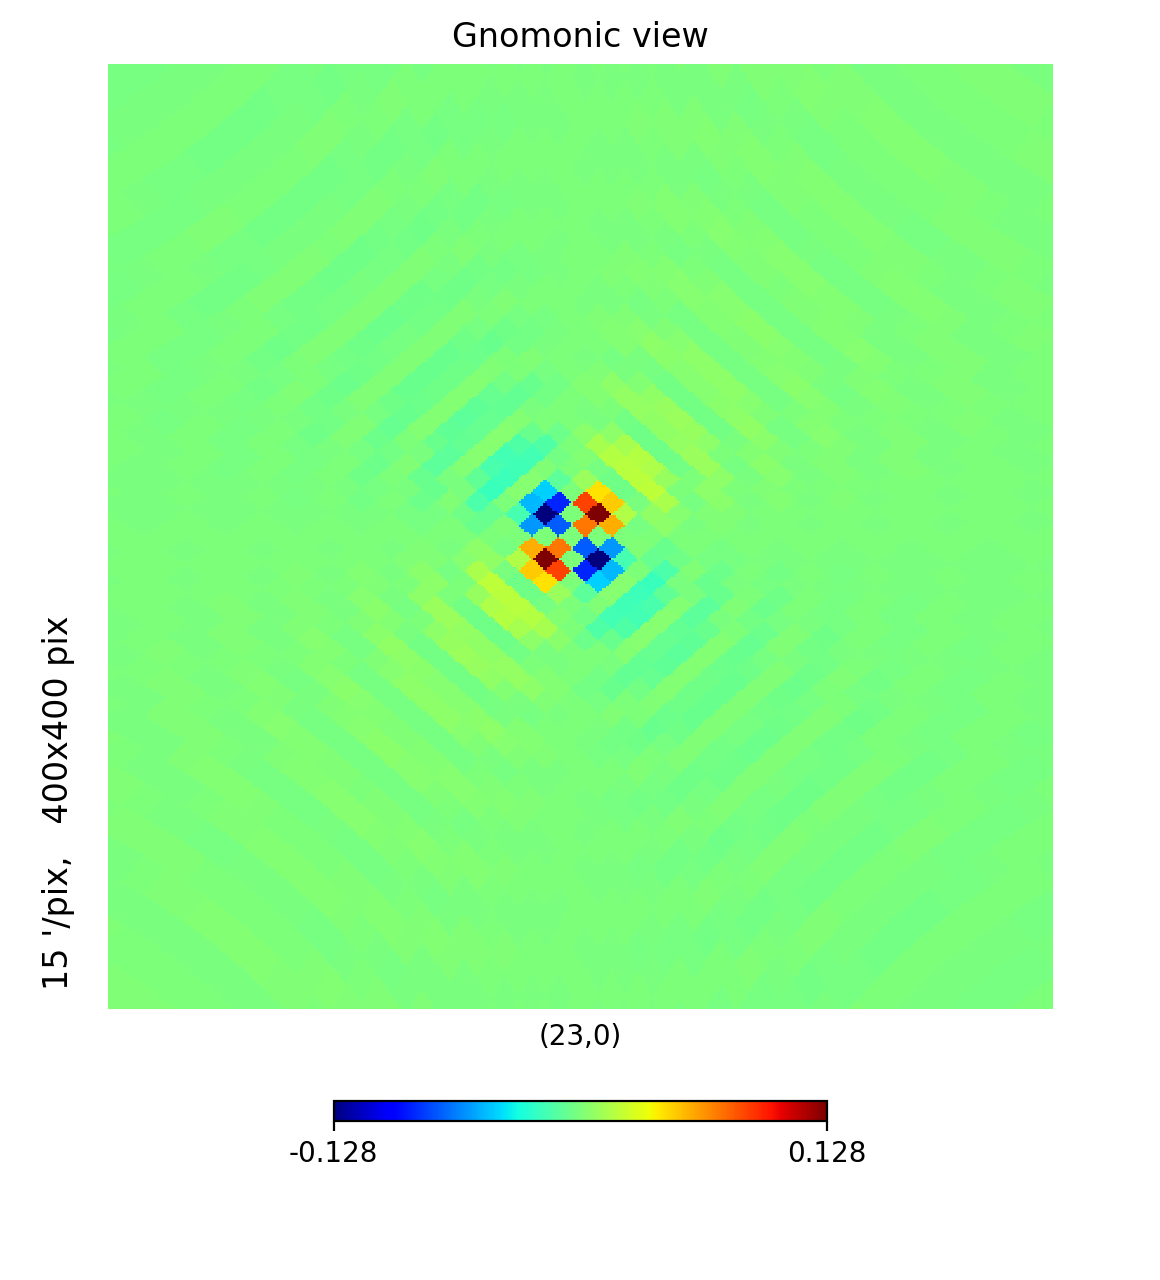

<IPython.core.display.Javascript object>


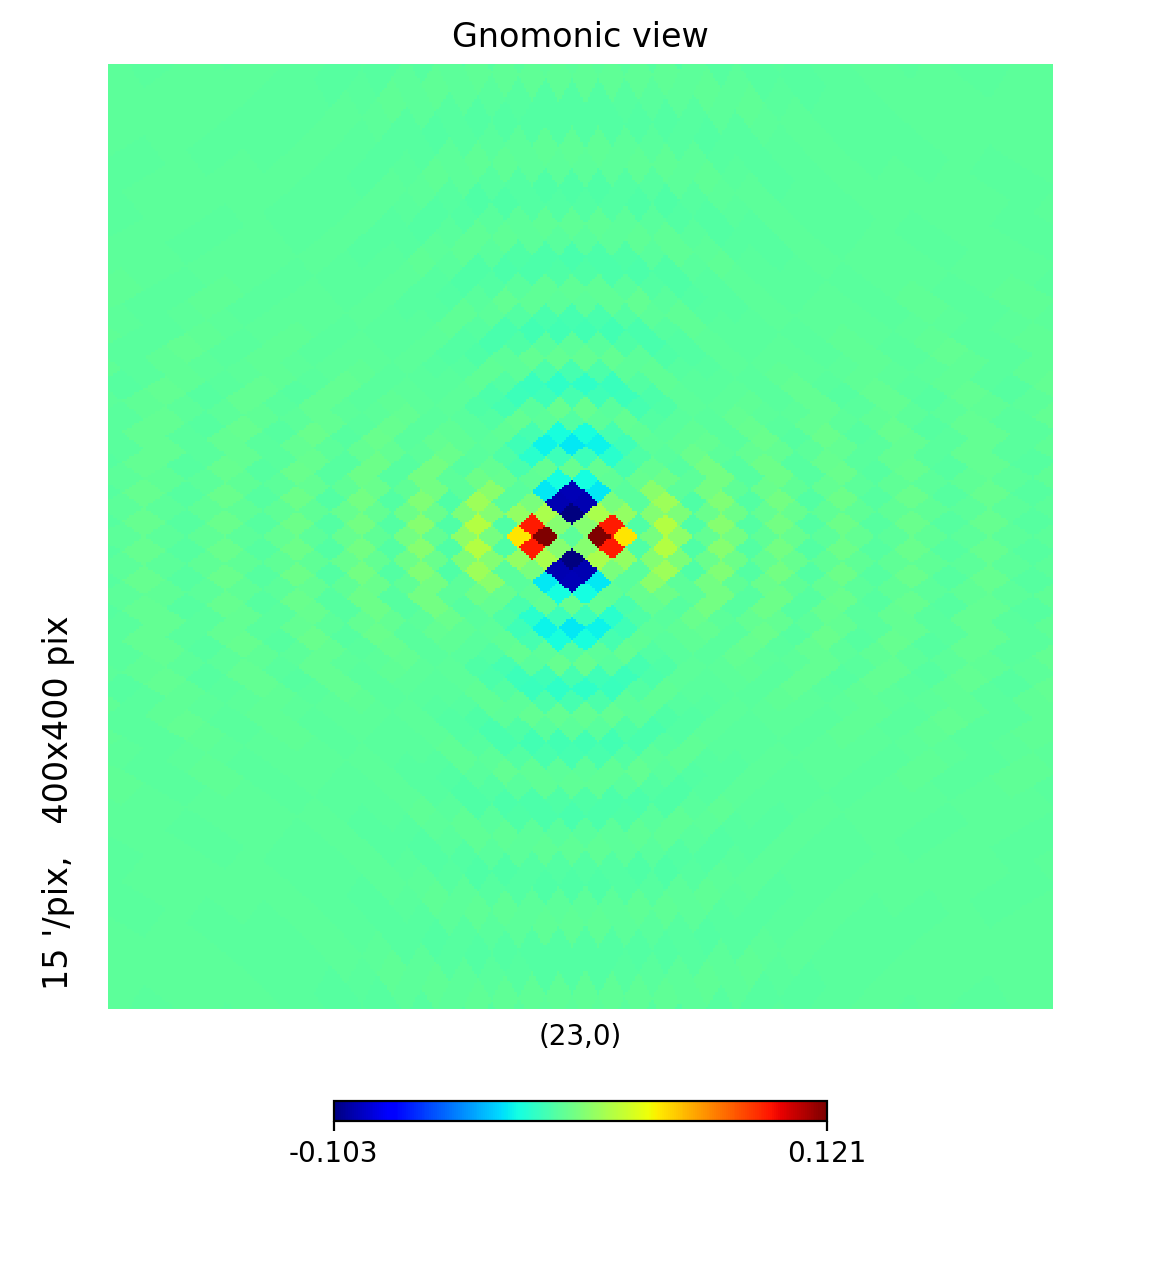

In [26]:
h.gnomview(rtqu[1],rot=(phi,90-theta),xsize=400,reso=15)
h.gnomview(rteb[1],rot=(phi,90-theta),xsize=400,reso=15)